# Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 

from tensorflow.keras import datasets, layers, models
from PIL import Image

# Loading Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

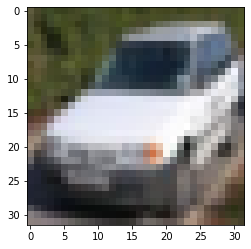

In [5]:
plt.imshow(train_images[46])

In [6]:
class_names[train_labels[46][0]]

'car'

# Displaying Data

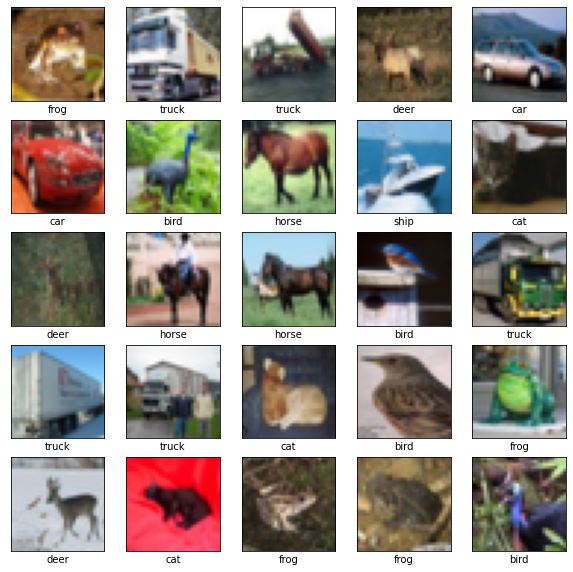

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

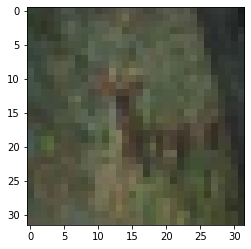

In [8]:
plt.imshow(train_images[10])

In [9]:
train_images.shape

(50000, 32, 32, 3)

In [10]:
test_images.shape

(10000, 32, 32, 3)

In [11]:
train_images[0][0][0] # Size 32 by 32, the 3 represents RGB colour

array([0.23137255, 0.24313725, 0.24705882])

# Creating Neural Network 

In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training model

In [15]:
trained_model = model.fit(train_images, train_labels, epochs=10, 
                validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 182us/sample - loss: 1.5127 - accuracy: 0.4482 - val_loss: 1.2319 - val_accuracy: 0.5632
Epoch 2/10
50000/50000 [==============================] - 7s 147us/sample - loss: 1.1534 - accuracy: 0.5921 - val_loss: 1.1155 - val_accuracy: 0.6054
Epoch 3/10
50000/50000 [==============================] - 7s 139us/sample - loss: 1.0070 - accuracy: 0.6446 - val_loss: 0.9741 - val_accuracy: 0.6599
Epoch 4/10
50000/50000 [==============================] - 7s 139us/sample - loss: 0.9052 - accuracy: 0.6849 - val_loss: 0.9241 - val_accuracy: 0.6776
Epoch 5/10
50000/50000 [==============================] - 7s 140us/sample - loss: 0.8307 - accuracy: 0.7119 - val_loss: 0.8800 - val_accuracy: 0.6933
Epoch 6/10
50000/50000 [==============================] - 7s 140us/sample - loss: 0.7757 - accuracy: 0.7295 - val_loss: 0.8751 - val_accuracy: 0.7005
Epoch 7/10
50000/50000 [==========================

# Saving Model

In [16]:
model.save('cifar_cnn2.h5')

# Testing Neural Network

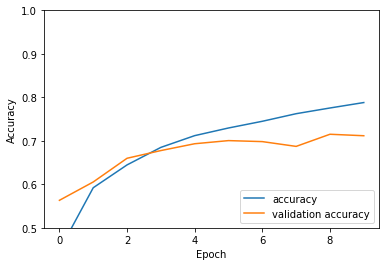

In [17]:
plt.plot(trained_model.history['accuracy'], label='accuracy')
plt.plot(trained_model.history ['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 1s - loss: 0.8839 - accuracy: 0.7117


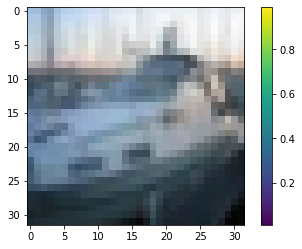

In [19]:
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
class_names[np.argmax(model.predict(test_images[2:3]))]

'ship'

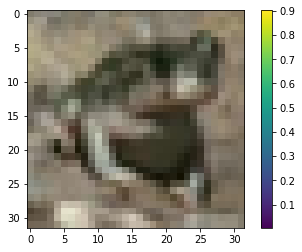

In [21]:
plt.figure()
plt.imshow(test_images[64])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
class_names[np.argmax(model.predict(test_images[64:65]))]

'frog'

# Testing With My Images


In [23]:
def pred_img(x):
    img1 = Image.open(x).convert(mode="RGB")
    img1 = img1.resize((32,32))
    array1 = np.array(img1.getdata())
    img_np_array = np.reshape(array1, (32,32,3)) / 255.0

    plt.imshow(np.reshape(array1, (32,32,3)))
    a = np.expand_dims(img_np_array, axis=0)
    return class_names[np.argmax(model.predict(a))], model.predict(a)

('ship',
 array([[ 2.499815 ,  2.8828082, -2.5681238, -4.746004 , -6.3182173,
         -4.4605236, -6.0447264, -5.0679626, 13.84926  , -1.7632948]],
       dtype=float32))

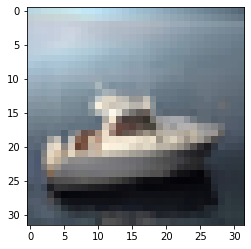

In [24]:
pred_img('my_images/1.jpg')

('frog',
 array([[-2.4974878 , -6.23723   , -0.08196491,  2.2000268 , -2.7380643 ,
         -1.1508665 ,  9.447677  , -2.6328568 , -5.215517  , -3.483592  ]],
       dtype=float32))

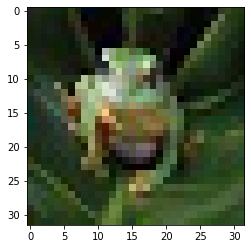

In [25]:
pred_img('my_images/2.jpg')

('car',
 array([[  4.3475695,  13.831881 ,  -6.0507417,  -5.101318 , -10.610072 ,
          -9.645901 ,  -7.12801  ,  -8.923283 ,   2.877558 ,   8.936509 ]],
       dtype=float32))

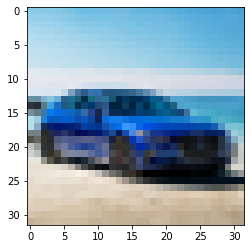

In [26]:
pred_img('my_images/3.jpg')

('horse',
 array([[ -4.226415  , -11.751712  ,   0.07068744,  -3.1048944 ,
           4.8896427 ,   1.2241404 ,  -4.1250844 ,  11.523345  ,
          -6.5088253 ,  -8.081841  ]], dtype=float32))

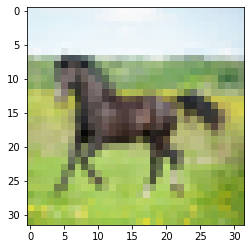

In [27]:
pred_img('my_images/4.jpg')

('dog',
 array([[-6.749583  , -9.42469   ,  1.088395  ,  4.094324  , -2.402636  ,
          7.226451  ,  0.61723304,  0.9669659 , -4.2489176 , -1.1158838 ]],
       dtype=float32))

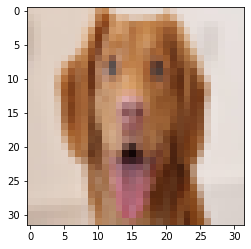

In [28]:
pred_img('my_images/5.jpg')